In [1]:
import pickle
#Unpickling the data
with open(r"C:\Users\HP\OneDrive\Desktop\Face Detection\clean data\images.p",'rb') as f:
    images = pickle.load(f)

with open(r"C:\Users\HP\OneDrive\Desktop\Face Detection\clean data\labels.p",'rb') as f:
    labels = pickle.load(f)

In [3]:
print(images.shape)
print(labels.shape)

(287, 100, 100)
(287,)


In [4]:
set(labels)

{'Anchal', 'Anisha', 'Barsha'}

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labels = le.fit_transform(labels)

In [6]:
set(labels)

{0, 1, 2}

In [7]:
import numpy as np

In [8]:
p = len(set(labels))
print('Number of persons:',p)

a = le.inverse_transform(np.arange(p))
for i in range(len(a)):
    print(i,'-->',a[i])

Number of persons: 3
0 --> Anchal
1 --> Anisha
2 --> Barsha


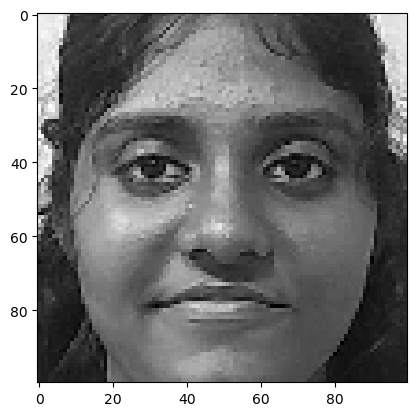

In [11]:
import matplotlib.pyplot as plt

plt.imshow(images[200],cmap='gray')
plt.show()

In [12]:
import cv2

In [13]:
def preprocessing(img):
    img = cv2.equalizeHist(img)
    img = img.reshape(100,100,1)
    img = img/255
    return img

In [14]:
images = np.array(list(map(preprocessing,images)))
print('Shape of Images:',images.shape)

Shape of Images: (287, 100, 100, 1)


In [15]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [37]:
def Lenet_model():
    model = Sequential()
    #Convolutional layer and ReLU layer 
    model.add(Conv2D(30,(5,5),input_shape=(100,100,1),activation='relu'))
    #Maxpooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(15,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    #Flatten layer
    model.add(Flatten())

    #Hidden layer
    model.add(Dense(100,activation='relu'))
    model.add(Dense(50,activation='relu'))

    #Output layer
    model.add(Dense(3,activation='softmax'))
    model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [39]:
model = Lenet_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 96, 96, 30)          │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 48, 48, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7935)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │         793,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 803,648 (3.07 MB)

 Trainable params: 803,648 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#Model Training
model.fit(images,labels,validation_split=0.1,epochs=15)

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.3744 - loss: 1.2922 - val_accuracy: 1.0000 - val_loss: 0.4680
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.7858 - loss: 0.5696 - val_accuracy: 1.0000 - val_loss: 0.0515
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.9170 - loss: 0.2602 - val_accuracy: 0.7931 - val_loss: 0.6514
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.8982 - loss: 0.5092 - val_accuracy: 1.0000 - val_loss: 0.0292
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 6.1574e-06
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9954 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 7.3992e-08
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 1.0000 - loss: 4.7064e-05 - val_accuracy: 1.0000 - val_loss: 1.0688e-07
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 1.0000 - loss: 4.8499e-07 - val_accuracy

In [43]:
model.save('final_model.h5')